## Econometrics - PS2
#### Adrien Rousset Planat
arousset@london.edu


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene
import statsmodels.api as sm

In [83]:
data_path="/Users/adrienroussetplanat/Library/CloudStorage/Dropbox/PhD/Courses/Econometrics_I/PS/"

## Problem 1 
### (d)

In [84]:
df = pd.read_excel(data_path+'wage.xlsx')
df['lwage'] = np.log(df['wage'])
df = df[['lwage','male']]

In [85]:
### Robust test
y_m = df[df['male'] == 1]['lwage']
y_f = df[df['male'] == 0]['lwage']
n_m = len(y_m)
n_f = len(y_f)
mean_m = np.mean(y_m)
mean_f = np.mean(y_f)
s_m = np.var(y_m)
s_f = np.var(y_f)


T = np.sqrt((n_m*n_f)/(n_m+n_f))*(np.log(s_f) - np.log(s_m))


k_hat = ((n_m+n_f)*(np.sum((y_f-mean_f)**4) + np.sum((y_m-mean_m)**4)))/((np.sum((y_f-mean_f)**2) + np.sum((y_m-mean_m)**2))**2)


c = T/np.sqrt(k_hat - 1)


print("T:", T)
print("K hat:", k_hat)
print("C statistic:", c)
if (c > 1.64):
    print('Reject H0: Var female > Var male')
else:
    print('Fail to reject H0: Var female = Var male')

T: 2.360423027217803
K hat: 7.3781207090510135
C statistic: 0.934638088888326
Fail to reject H0: Var female = Var male


In [86]:
levene_test = levene(y_m, y_f)
levene_test

LeveneResult(statistic=1.402160294849269, pvalue=0.23644763866694196)

In [87]:
### Standard (normal theory) test
var_f = np.var(y_f, ddof=1)
var_m = np.var(y_m, ddof=1)
 
f_value = var_f / var_m 
 
df_f = n_f - 1
df_m = n_m - 1
 
p_value = 1 - stats.f.cdf(f_value, df_f, df_m)
 
print("F-statistic:", f_value)
print("p-value:", p_value)
if (p_value<0.05):
    print('Reject H0: Var female > Var male')
else:
    print('Fail to reject H0: Var female = Var male')

F-statistic: 1.0858707722186227
p-value: 0.04734658854083462
Reject H0: Var female > Var male


## Problem 2 
### (c)

In [91]:
n = 300
p =[]
for j in range(21):
    p.append(100 + 30*j) 

v_n_greater = []
v_n_smaller = []
b = []
aux_v_n_greater = []
aux_v_n_smaller = []
for i in p:
    if i < n:
        v_n_greater.append(i/(n-i))
        aux_v_n_greater.append(i)
        
    if i > n:
        v_n_smaller.append(n/(i-n))
        b.append((i-n)/i)
        aux_v_n_smaller.append(i)
        
print('Variance when n > p: ', np.round(v_n_greater,3))
print('Variance when n < p: ', np.round(v_n_smaller,3))
print('Bias: ',np.round(b,3))

Variance when n > p:  [ 0.5    0.765  1.143  1.727  2.75   5.    14.   ]
Variance when n < p:  [30.     7.5    4.286  3.     2.308  1.875  1.579  1.364  1.2    1.071
  0.968  0.882  0.811  0.75 ]
Bias:  [0.032 0.118 0.189 0.25  0.302 0.348 0.388 0.423 0.455 0.483 0.508 0.531
 0.552 0.571]


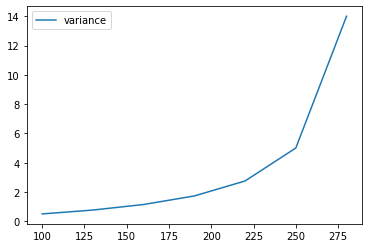

In [92]:
plt.plot(aux_v_n_greater, v_n_greater, label='variance')
plt.legend()
plt.show()

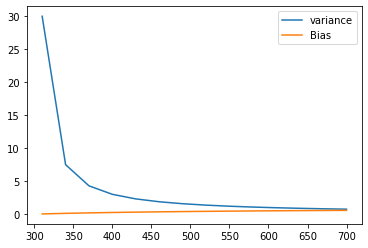

In [93]:
plt.plot(aux_v_n_smaller, v_n_smaller, label='variance')
plt.plot(aux_v_n_smaller, b, label='Bias')
plt.legend()
plt.show()

## Problem 5

### Generate $y_t$

In [29]:
rho1=0
rho2=0.5
rho3=0.95
y1 = np.empty(100)
y2 = np.empty(100)
y3 = np.empty(100)
B = np.zeros(100)
eps = np.random.normal(0, 1, 100)
   
y1[0] = 0
y2[0] = 0
y3[0] = 0
for t in range(1, 100):
    y1[t] = rho1 * y1[t-1] + eps[t]
    y2[t] = rho2 * y2[t-1] + eps[t]
    y3[t] = rho3 * y3[t-1] + eps[t]
x=np.arange(1, 101, 1, dtype=int)

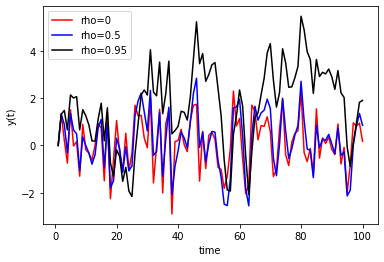

In [30]:
plt.plot(x, y1, color ="red",label="rho=0") 
plt.plot(x, y2, color ="blue",label="rho=0.5") 
plt.plot(x, y3, color ="black",label="rho=0.95") 
plt.legend()
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

### OLS estimations

In [31]:
ols_y1 = sm.regression.linear_model.OLS(y1, x).fit()
ols_y1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.6851
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                       0.410
Time:                        17:44:12   Log-Likelihood:                         -151.53
No. Observations:                 100   AIC:                                      305.1
Df Residuals:                      99   BIC:                                      307.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0016      0.002      0.828      0.410      -0.002       0.005
==============================================================================
Omnibus:                        2.000   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.935
Skew:                          -0.263   Prob(JB):                        0.380
Kurtosis:                       2.565   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(f"The OLS estimator is: {ols_y1.params[0]}, and its t-stat is: {ols_y1.tvalues[0]}")

The OLS estimator is: 0.0015748597975487686, and its t-stat is: 0.8277321894195623


In [33]:
ols_y2 = sm.regression.linear_model.OLS(y2, x).fit()
ols_y2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.020
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              2.036
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                       0.157
Time:                        17:44:12   Log-Likelihood:                         -159.98
No. Observations:                 100   AIC:                                      322.0
Df Residuals:                      99   BIC:                                      324.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0030      0.002      1.427      0.157      -0.001       0.007
==============================================================================
Omnibus:                        1.021   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.118
Skew:                          -0.215   Prob(JB):                        0.572
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print(f"The OLS estimator is: {ols_y2.params[0]}, and its t-stat is: {ols_y2.tvalues[0]}")

The OLS estimator is: 0.002953975741109654, and its t-stat is: 1.4267822323622936


In [35]:
ols_y3 = sm.regression.linear_model.OLS(y3, x).fit()
ols_y3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.539
Model:                            OLS   Adj. R-squared (uncentered):              0.535
Method:                 Least Squares   F-statistic:                              116.0
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                    2.31e-18
Time:                        17:44:13   Log-Likelihood:                         -190.20
No. Observations:                 100   AIC:                                      382.4
Df Residuals:                      99   BIC:                                      385.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0302      0.003     10.769      0.000       0.025       0.036
==============================================================================
Omnibus:                        4.618   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.344
Skew:                          -0.510   Prob(JB):                        0.114
Kurtosis:                       3.029   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(f"The OLS estimator is: {ols_y3.params[0]}, and its t-stat is: {ols_y3.tvalues[0]}")

The OLS estimator is: 0.0301626775989863, and its t-stat is: 10.769301269563861


### Estimate Newey-West standard errors

In [44]:
ols_y1_nw = sm.regression.linear_model.OLS(y1, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y1_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                              1.023
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                       0.314
Time:                        20:00:14   Log-Likelihood:                         -151.53
No. Observations:                 100   AIC:                                      305.1
Df Residuals:                      99   BIC:                                      307.7
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0016      0.002      1.012      0.312      -0.001       0.005
==============================================================================
Omnibus:                        2.000   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.935
Skew:                          -0.263   Prob(JB):                        0.380
Kurtosis:                       2.565   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [38]:
ols_y2_nw = sm.regression.linear_model.OLS(y2, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y2_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.020
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              1.421
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                       0.236
Time:                        17:44:14   Log-Likelihood:                         -159.98
No. Observations:                 100   AIC:                                      322.0
Df Residuals:                      99   BIC:                                      324.6
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0030      0.002      1.192      0.233      -0.002       0.008
==============================================================================
Omnibus:                        1.021   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.118
Skew:                          -0.215   Prob(JB):                        0.572
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [39]:
ols_y3_nw = sm.regression.linear_model.OLS(y3, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y3_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.539
Model:                            OLS   Adj. R-squared (uncentered):              0.535
Method:                 Least Squares   F-statistic:                              34.13
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                    6.59e-08
Time:                        17:44:15   Log-Likelihood:                         -190.20
No. Observations:                 100   AIC:                                      382.4
Df Residuals:                      99   BIC:                                      385.0
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0302      0.005      5.842      0.000       0.020       0.040
==============================================================================
Omnibus:                        4.618   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.344
Skew:                          -0.510   Prob(JB):                        0.114
Kurtosis:                       3.029   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

## Compare t-stats

In [59]:
data = {'tstat': [ols_y1.tvalues[0], ols_y2.tvalues[0], ols_y3.tvalues[0]], 'tstat - NW': [ols_y1_nw.tvalues[0], ols_y2_nw.tvalues[0], ols_y3_nw.tvalues[0]]}
df = pd.DataFrame(data,index=["rho=0", "rho=0.5", "rho=0.95"])
df 

,tstat,tstat - NW
rho=0,0.827732,1.011502
rho=0.5,1.426782,1.192062
rho=0.95,10.769301,5.842182


**<u>rho > 0:</u>**

In the case of positive serial correlation , OLS standard errors underestimate the true standard errors. Thus, the t-stats are higher than the t-stats computed using the NW standard errors.

**<u>rho = 0:</u>**

Under OLS, covariance terms are 0 by assumption GM3: $\text{Var}(Y|X) = \sigma^2 I$, which is consistent with the true data generating process.

Under NW, autocovariances of $x_t\epsilon_t$ of up to 4 lags are estimated to be close to 0, but not exactly 0. This induces an imperfect estimation of the standard errors, which may be higher or
lower than the true standard errors. 

### Annnex - Estimate standard errors under OLS, and NW simulating  multiple $y_t$

In [74]:
num_iterations = 100
rho1 = 0
output = []

for xx in range(1, num_iterations + 1):
    eps_loop = np.random.normal(0, 1, 100)
    y1_loop = np.empty(100)
    y1_loop[0] = 0
    x = np.arange(1, 101, 1, dtype=int)

    for t in range(1, 100):
        y1_loop[t] = rho1 * y1_loop[t-1] + eps_loop[t]

    ols_loop = sm.OLS(y1_loop, x).fit()
    ols_nw = sm.OLS(y1_loop, x).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

    se_ols = ols_loop.bse[0]
    se_nw = ols_nw.bse[0]
    smaller_under_ols = se_ols < se_nw  

    output.append([xx, se_ols, se_nw, smaller_under_ols])


df = pd.DataFrame(output, columns=["Iteration", "SE OLS", "SE NW", "Smaller Under OLS"])
pd.set_option('display.max_rows', 500) 


In [75]:
df

,Iteration,SE OLS,SE NW,Smaller Under OLS
0,1,0.001753,0.001381,False
1,2,0.001822,0.001728,False
2,3,0.001824,0.001536,False
3,4,0.001851,0.002410,True
4,5,0.001835,0.001994,True
5,6,0.001621,0.001623,True
6,7,0.001619,0.001646,True
7,8,0.001704,0.001760,True
8,9,0.001643,0.001961,True
9,10,0.001612,0.002045,True
